# Определение перспективного тарифа для телеком-компании.

## Изучение общей информации.

In [1]:
#импортируем нужные библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st

In [2]:
#читаем файлы
data_users = pd.read_csv('/datasets/users.csv')
data_calls = pd.read_csv('/datasets/calls.csv')
data_messages = pd.read_csv('/datasets/messages.csv')
data_internet = pd.read_csv('/datasets/internet.csv')
data_tariffs = pd.read_csv('/datasets/tariffs.csv')

In [3]:
# посмотрим на общую информацию по каждой таблице
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


По данной таблице данные в целом пригодны для дальнейшего анализа. Пропуски в churne_date стоят специально и означают, что тариф еще действует на дату выгрузки. Единственное, что можно преобразовать это колонка red_date в формат datetime для удобства анализа по временным параметрам.

In [5]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [6]:
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Аналогично предыдущей таблице колонку с датами можно преобразовать в более удобный формат. Возможно в целях далейнешего анализа понадобится группировка данных по user_id. Пропусков нет. 0 звонки как было сказано - означают пропущенные вызовы. Сами вызовы можно округлить в большую стороны исходя из условий тарифов.

In [7]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [8]:
data_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Аналогично, изменение форматы даты и возможнная группировка.

In [9]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [10]:
data_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [11]:
data_internet.tail()

,Unnamed: 0,id,mb_used,session_date,user_id
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


Аналогично, предыдущим замечаниям и здесь есть странная колонка unnamed:0 похожая на задвоение индексации (также в документации она не упоминается), возможно это ошибка выгрузки. Думаю ее можно просто удалить из даты. Также мегабайты можно перевести в гигабайты, учитывая условия по плате за тариф.

In [12]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [13]:
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Описание тарифов. Здесь все в порядке.

В целом данные практически готовы для анализа. Необходимо будет преобразовать только колонку с датами и избавится от колонки с задвоенными индексами, минуты округлить вверх, а мегабайты превратить в гигабайты. Также таблицы имеют общие колонки, по которым будет удобно сделать в дальнейшем один датасет.  

##  Подготовка данных

### Преобразование данных.

In [14]:
# преобразуем столбцы с датами и извлечем месяцы, так как данные у нас за год
#и в данном прокте требуетсмя только помесячный анализ параметров
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format ='%Y-%m-%d')
data_users['month'] = pd.DatetimeIndex(data_users['reg_date']).month
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,8
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5


In [15]:
#аналогично сделаем для других таблиц
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format ='%Y-%m-%d')
data_calls['month'] = pd.DatetimeIndex(data_calls['call_date']).month

data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format ='%Y-%m-%d')
data_messages['month'] = pd.DatetimeIndex(data_messages['message_date']).month

data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format ='%Y-%m-%d')
data_internet['month'] = pd.DatetimeIndex(data_internet['session_date']).month

In [16]:
# удалим столбец unnamed:0
data_internet = data_internet.drop('Unnamed: 0', axis=1)

In [17]:
# переведем мегабайты в гигабайты и удалим старую
data_internet['gb_used'] =data_internet['mb_used']/1000
data_internet = data_internet.drop('mb_used', axis=1)

In [18]:
data_internet['gb_used']=round(data_internet['gb_used'], 2)

In [19]:
#округлим минуты в большую сторону
import math
def round_colomn(column):
    x = math.ceil(column)
    return x
data_calls['duration'] = data_calls['duration'].apply(round_colomn)

In [21]:
# добавим гигайбайты тарифные планы
data_tariffs['gb_internet_included']=data_tariffs['mb_per_month_included']/1000


Данные преобразованы для дальнейшей работы.

### Расчет дополнительных параметров.

In [22]:
# расчитаем количество звонков и дилтельность по пользователям в разрезе месяцев
calls_pivot = data_calls.pivot_table(index=['user_id','month'], values='duration', aggfunc=['count','sum'])
calls_pivot.columns = ['count_calls', 'duration_calls']
calls_pivot

count_calls  duration_calls
user_id month                             
1000    5               22             159
        6               43             172
        7               47             340
        8               52             408
        9               58             466
...                    ...             ...
1498    10              41             247
1499    9                9              70
        10              68             449
        11              74             612
        12              69             492

[3174 rows x 2 columns]

In [23]:
#находим количесвто сообщений по месяцам
messages_pivot = data_messages.pivot_table(index=['user_id','month'], values='message_date', aggfunc='count')
messages_pivot.columns =['count_messages']
messages_pivot

count_messages
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
...                       ...
1498    10                 42
1499    9                  11
        10                 48
        11                 59
        12                 66

[2717 rows x 1 columns]

In [24]:
#находим количесвто интернет трафика по месяцам
internet_pivot = data_internet.pivot_table(index=['user_id','month'], values='gb_used', aggfunc='sum')
internet_pivot.columns =['internet_total']
internet_pivot

internet_total
user_id month                
1000    5                2.25
        6               23.22
        7               14.02
        8               14.06
        9               14.56
...                       ...
1498    10              20.57
1499    9                1.85
        10              17.79
        11              17.94
        12              13.08

[3203 rows x 1 columns]

In [25]:
#теперь будем расчитывать доход по пользователям, но сначала обьекдиним все в один датасет
all_data = messages_pivot.merge(calls_pivot, on=['user_id','month'], how='outer')
all_data = all_data.merge(internet_pivot, on=['user_id','month'], how='outer') 
all_data = all_data.reset_index()
all_data = data_users[['user_id','city', 'tariff']].merge(all_data, on='user_id', how='right')
all_data 

,user_id,city,tariff,month,count_messages,count_calls,duration_calls,internet_total
0,1000,Краснодар,ultra,5,22.0,22.0,159.0,2.25
1,1000,Краснодар,ultra,6,60.0,43.0,172.0,23.22
2,1000,Краснодар,ultra,7,75.0,47.0,340.0,14.02
3,1000,Краснодар,ultra,8,81.0,52.0,408.0,14.06
4,1000,Краснодар,ultra,9,57.0,58.0,466.0,14.56
...,...,...,...,...,...,...,...,...
3209,1498,Владикавказ,smart,10,42.0,41.0,247.0,20.57
3210,1499,Пермь,smart,9,11.0,9.0,70.0,1.85
3211,1499,Пермь,smart,10,48.0,68.0,449.0,17.79
3212,1499,Пермь,smart,11,59.0,74.0,612.0,17.94


In [26]:
all_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
user_id           3214 non-null int64
city              3214 non-null object
tariff            3214 non-null object
month             3214 non-null int64
count_messages    2717 non-null float64
count_calls       3174 non-null float64
duration_calls    3174 non-null float64
internet_total    3203 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 226.0+ KB


In [27]:
# все пропуски можно заполнить 0, а данные привести к целым числам
all_data = all_data.fillna(0)

In [28]:
all_data['count_messages'] = all_data['count_messages'].astype('int')
all_data['count_calls'] = all_data['count_calls'].astype('int')
all_data['duration_calls'] = all_data['duration_calls'].astype('int')

In [29]:
# найдем по месячный доход пропишем функцию для строки
def revenue(row):
    revenue = 0
    if row['tariff']=='ultra':
        call_pay = row['duration_calls'] - data_tariffs.loc[1,'minutes_included']
        message_pay = row['count_messages'] - data_tariffs.loc[1,'messages_included']
        internet_pay = np.ceil(row['internet_total'] - data_tariffs.loc[1,'gb_internet_included'])
        revenue = data_tariffs.loc[1,'rub_monthly_fee']
        if call_pay>0:
            revenue +=call_pay*data_tariffs.loc[1,'rub_per_minute']
        if message_pay>0:
            revenue +=message_pay*data_tariffs.loc[1,'rub_per_message']
        if internet_pay>0:
            revenue +=internet_pay*data_tariffs.loc[1,'rub_per_gb']
        return revenue
    if row['tariff']=='smart':
        call_pay = row['duration_calls'] - data_tariffs.loc[0,'minutes_included']
        message_pay = row['count_messages'] - data_tariffs.loc[0,'messages_included']
        internet_pay = np.ceil(row['internet_total'] - data_tariffs.loc[0,'gb_internet_included'])
        revenue = data_tariffs.loc[0,'rub_monthly_fee']
        if call_pay>0:
            revenue +=call_pay*data_tariffs.loc[0,'rub_per_minute']
        if message_pay>0:
            revenue +=message_pay*data_tariffs.loc[0,'rub_per_message']
        if internet_pay>0:
            revenue +=internet_pay*data_tariffs.loc[0,'rub_per_gb']
        return revenue
    
all_data['revenue'] =all_data.apply(revenue, axis=1)
all_data

,user_id,city,tariff,month,count_messages,count_calls,duration_calls,internet_total,revenue
0,1000,Краснодар,ultra,5,22,22,159,2.25,1950.0
1,1000,Краснодар,ultra,6,60,43,172,23.22,1950.0
2,1000,Краснодар,ultra,7,75,47,340,14.02,1950.0
3,1000,Краснодар,ultra,8,81,52,408,14.06,1950.0
4,1000,Краснодар,ultra,9,57,58,466,14.56,1950.0
...,...,...,...,...,...,...,...,...,...
3209,1498,Владикавказ,smart,10,42,41,247,20.57,1750.0
3210,1499,Пермь,smart,9,11,9,70,1.85,550.0
3211,1499,Пермь,smart,10,48,68,449,17.79,1150.0
3212,1499,Пермь,smart,11,59,74,612,17.94,1513.0


Наобходимые данные были расчитаны и добавлены в одну таблицу, теперь можно приступать к анализу.

##  Анализ данных

In [30]:
# Посчитаем среднюю, дисперсию и стандартное отклонение в разрезе тарифов
# для удобства разделим датасет по тарифам
all_data_ultra = all_data.query('tariff=="ultra"')
all_data_smart = all_data.query('tariff=="smart"')


In [31]:
#На основании этой разбивки найдем искомые параметры
mean_calls_ultra = all_data_ultra['duration_calls'].mean()
print('Среднее количество минут тарифа Ultra:', int(mean_calls_ultra))
mean_message_ultra = all_data_ultra['count_messages'].mean()
print('Среднее количество сообщений тарифа Ultra:', int(mean_message_ultra))
mean_internet_ultra = all_data_ultra['internet_total'].mean()
print('Среднее количество гигабайт интеренет трафика тарифа Ultra:', int(mean_internet_ultra))

Среднее количество минут тарифа Ultra: 526
Среднее количество сообщений тарифа Ultra: 49
Среднее количество гигабайт интеренет трафика тарифа Ultra: 19


In [32]:
mean_calls_smart = all_data_smart ['duration_calls'].mean()
print('Среднее количество минут тарифа Smart:', int(mean_calls_smart))
mean_message_smart  = all_data_smart ['count_messages'].mean()
print('Среднее количество сообщений тарифа Smart:', int(mean_message_smart ))
mean_internet_smart  = all_data_smart ['internet_total'].mean()
print('Среднее количество гигабайт интеренет трафика тарифа Smart:', int(mean_internet_smart))

Среднее количество минут тарифа Smart: 417
Среднее количество сообщений тарифа Smart: 33
Среднее количество гигабайт интеренет трафика тарифа Smart: 16


Исходя из средних значений тарифов обьема услуг предоставляемых компанией практически хватает пользователям. По тарифу smart есть превышение по интернету. По тарифу Ultra обьем в полной мере не используется в среднем. Количество сообщений в обоих тарифах не используется значительно.

In [33]:
#найдем дисперсии Ultra
var_calls_ultra = np.var(all_data_ultra['duration_calls'], ddof=1)
var_message_ultra = np.var(all_data_ultra['count_messages'], ddof=1)
var_internet_ultra = np.var(all_data_ultra['internet_total'], ddof=1)

#найдем дисперсии Smart
var_calls_smart = np.var(all_data_smart['duration_calls'], ddof=1)
var_message_smart = np.var(all_data_smart['count_messages'], ddof=1)
var_internet_smart = np.var(all_data_smart['internet_total'], ddof=1)

In [34]:
# найдем стандартные отклонения
std_calls_ultra = np.sqrt(var_calls_ultra)
print('Стандартное отклонение минут тарифа Ultra:', int(std_calls_ultra))
std_message_ultra = np.sqrt(var_message_ultra)
print('Стандартное отклонение сообщений тарифа Ultra:', int(std_message_ultra))
std_internet_ultra = np.sqrt(var_internet_ultra )
print('Стандартное отклонение гигабайт интеренет трафика тарифа Ultra:', int(std_internet_ultra))

std_calls_smart = np.sqrt(var_calls_smart)
print('Стандартное отклонение минут тарифа Smart:', int(std_calls_smart))
std_message_smart  = np.sqrt(var_message_smart)
print('Стандартное отклонение сообщений тарифа Smart:', int(std_message_smart))
std_internet_smart  = np.sqrt(var_internet_smart)
print('Стандартное отклонение гигабайт интеренет трафика тарифа Smart:', int(std_internet_smart))

Стандартное отклонение минут тарифа Ultra: 317
Стандартное отклонение сообщений тарифа Ultra: 47
Стандартное отклонение гигабайт интеренет трафика тарифа Ultra: 10
Стандартное отклонение минут тарифа Smart: 190
Стандартное отклонение сообщений тарифа Smart: 28
Стандартное отклонение гигабайт интеренет трафика тарифа Smart: 5


Если исходить из правила трех сигм то звонки тарифа Ultra распределены в рамках месячного пакета (526+3*317 = 1477 минут), когда как у тарифа Smart значения распределеные до вверхней границы (987 минут). Это дает сделать вывод, что ряду пользователей данных минут значительно не хватает. Касательно сообщений то их хвататет и в том тарифе и в том, а вот с интернетом дела обстоят по другому. Распределение обоих тарифов сильно превышает, предложенное в рамках тарифных пакетах. В Ultra верхняя граница будет около 49 гб интеренета, а у смарт примерно 31 гб. Выходит, что ряд пользователей намного первышает пакеты Smart тарифа на текущий момент пока, что реклама для тарифа Ultra предпочтительнее. Также компании стоит задумать о альтернативных тарифах, либо сделать модификации текущих. Тот же Ultra мог бы получить версию Ultra+ с повышенным интеренетом.

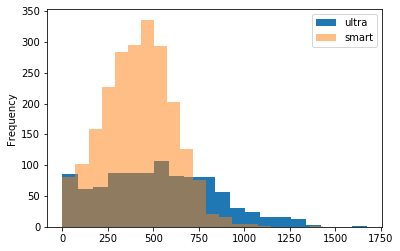

In [37]:
# Для большей наглядности вышеизложенных наблюдений построим гистограммы
ultra_calls = all_data_ultra['duration_calls'].plot(kind='hist', bins=20, alpha=1, label='ultra',legend=True)
all_data_smart['duration_calls'].plot(kind='hist', bins=20, ax=ultra_calls, alpha=0.5, label='smart',legend=True)

На гистограммах видно нормальное распределение. Обе скошенны вправо из-за больших значений и небольшим скачком в 0, в силу того что есть пользователи скорре всего, которые пользуются только интеренетом. По Smart тарифу распределение сильно превышает обьем по минутам, много значений находится за чертой в 500 мин. и распределены в значительной части до 800-900 минут. По Ultra тарифу виден один выброс, который и превыщает условия тарифа, но в целом распределение в рамках обьема тарифа.

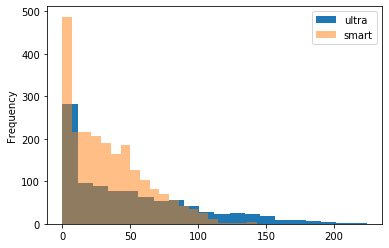

In [38]:
ultra_messages = all_data_ultra['count_messages'].plot(kind='hist', bins=20, alpha=1, label='ultra',legend=True)
all_data_smart['count_messages'].plot(kind='hist', bins=20, ax=ultra_messages, alpha=0.5, label='smart',legend=True)

Как было отмечено ранее сообщениеями современные пользователи не сильно пользуются. Пик диаграммы лежит в 0 и имеет скос вправо. Можно сказать, что современные пользователи мало пользуются сообщениями.

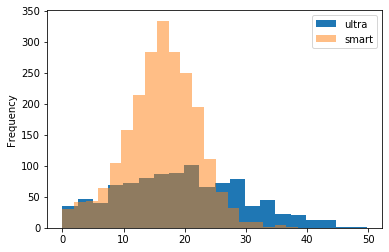

In [39]:
ultra_internet = all_data_ultra['internet_total'].plot(kind='hist', bins=20, alpha=1, label='ultra',legend=True)
all_data_smart['internet_total'].plot(kind='hist', bins=20, ax=ultra_internet, alpha=0.5, label='smart',legend=True)

На гистограмме видно нормальное распределение. Скошенное вправо из-за больших значений, причем достаточно сильно. По тарифу Ultra есть много скачков от центра (20 гб). Видно, что значительная часть доходит до значения в 45 гб. По тарифу Smart как и в случае со звонками, видно, что значительной части пользователей сильно не хвататет интернет трафика и распределение в целом доходит до 30 гб интернета.

Интерпритируя полученныю результаты, выходит, что части пользователей пакета Smart не хватает их тарифных обьемов как и звонков, так и интернет трафика. Учитывая их запросы, логичнее будет проводить рекламу тарифа Ultra. Однако не обходимо понять, какие доходы приносит каждый из тарифов.

## Проверка гипотез

### Различаются ли средние выручки по тарифам

In [40]:
# обьявим гипотезу H0 - средние выручки равны, альтернативная гипотеза H1 будет заключаться что не равны.
# найдем среднюю выручку тарифа Ultra
mean_revenue_ultra = all_data_ultra['revenue'].mean()

#обьявим уровень критичности 
alpha=0.05
test = st.ttest_1samp(all_data_smart['revenue'], mean_revenue_ultra)
if test.pvalue<alpha:
    print('H0 можно отвергнуть, средние выручек не равны')
else:
    print('H0 нельзя отвергнуть, средние выручек равны')

H0 можно отвергнуть, средние выручек не равны


In [41]:
#Как показал т-тест средние будут отличаться друг от друга. Выведем средние по доходам.
print('Средняя тарифа Ultra', mean_revenue_ultra)
mean_revenue_smart = all_data_smart['revenue'].mean()
print('Средняя тарифа Smart', mean_revenue_smart)

Средняя тарифа Ultra 2072.5888324873094
Средняя тарифа Smart 1303.073575594437


В целом разница очень заметна. По тарифу Ultra компания собирает в среднем больше дохода, несмотря на большие переплаты со стороны тарифа Smart.



### Различаются ли средние выручки по регионам

In [42]:
# обьявим гипотезу H0 - средние выручки равны, альтернативная гипотеза H1 будет заключаться что не равны.
# найдем средние для москвы и других городов
mean_msk = all_data.query('city =="Москва"')['revenue'].mean()
mean_region = all_data.query('city !="Москва"')['revenue'].mean()
print('Средняя выручка для Москвы', mean_msk)
print('Средняя выручка для регионов', mean_region)

Средняя выручка для Москвы 1554.6513911620295
Средняя выручка для регионов 1535.212831348444


In [43]:
#На первый взгляд они практически равны. Необходимо провести статистический анализ для подтверждения этой догадки.
test2 = st.ttest_1samp(all_data.query('city !="Москва"')['revenue'],mean_msk)
if test2.pvalue<alpha:
    print('H0 можно отвергнуть, средние выручек не равны')
else:
    print('H0 нельзя отвергнуть, средние выручек равны')
    
test3 = st.ttest_1samp(all_data.query('city =="Москва"')['revenue'],mean_region)
if test3.pvalue<alpha:
    print('H0 можно отвергнуть, средние выручек не равны')
else:
    print('H0 нельзя отвергнуть, средние выручек равны')    

H0 нельзя отвергнуть, средние выручек равны
H0 нельзя отвергнуть, средние выручек равны


Проведя тест меняя предполагаемые значения вышло, что отличия выручек между Москвой и остальными регионами в совокупности нет.

## Общий вывод

Части пользователей тарифа Smart не хватат получаемых обьемов по самому тарифу, таким образом скорее всего у них есть интерес в получении большего обьема услуг. Учитывая, что средняя выручки тарифа Ultra все равно больше, чем средняя тарифа Smart дажt с большими переплатами, то выгоднее развивать рекламную компанию по тарифу Ultra.